# Airline Passenger Satisfaction

## Importing libraries

In [1]:
# For databases
import pandas as pd
import numpy as np

# For ploting graphs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

# Transforming data
from sklearn.decomposition import PCA

# Modeling machine learning
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Modeling the clusters
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer

## Formating to hide code

In [2]:
# Acknowledments to https://github.com/AxZxP

from IPython.display import HTML
import random
def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'
    toggle_text = 'Show/hide code'  
    target_cell = this_cell  
    js_hide_current = ''
    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'
    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))
    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}
            {js_hide_current}
        </script>
        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )
    return HTML(html)

hide_toggle()

## Importing data

In [3]:
airline_train = pd.read_csv("data/airline-train.csv")

## Understanding the data

In [4]:
airline_train.shape

(103904, 25)

In [5]:
airline_train.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
airline_train.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [7]:
airline_train.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [8]:
# Checking if there's any duplicate row
airline_train[airline_train.duplicated()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


## Data cleaning

In [9]:
# Droping column "Unnamed: 0" because it doesn't increment in my analysis:
airline_train.drop(columns="Unnamed: 0", inplace=True)

# Reseting index for "id" since these values are unique for each row:
airline_train.set_index("id", inplace=True)

# Gender : 1 for Female and 0 for Male
airline_train.Gender = airline_train.Gender.apply(lambda x: 1 if x=="Female" else 0)

airline_train.head(7)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,0,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,0,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,1,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
24026,1,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,0,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
111157,1,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
82113,0,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied


In [10]:
# Sorting by the index, in order to have a cleaner structure
airline_train.sort_values(by="id",inplace=True)
airline_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,0,disloyal Customer,48,Business travel,Business,821,3,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
2,1,Loyal Customer,35,Business travel,Business,821,2,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
3,0,Loyal Customer,41,Business travel,Business,853,4,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
4,0,Loyal Customer,50,Business travel,Business,1905,2,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
5,1,Loyal Customer,49,Business travel,Business,3470,3,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,1,Loyal Customer,28,Personal Travel,Eco Plus,337,4,2,4,4,...,3,1,5,3,4,4,3,0,0.0,neutral or dissatisfied
129875,1,Loyal Customer,55,Personal Travel,Eco Plus,308,3,4,3,4,...,4,4,3,4,4,4,4,0,0.0,neutral or dissatisfied
129878,0,Loyal Customer,42,Personal Travel,Eco Plus,337,2,5,2,1,...,3,3,4,5,4,4,3,6,14.0,neutral or dissatisfied


In [11]:
airline_train["Customer Type"].unique()

array(['disloyal Customer', 'Loyal Customer'], dtype=object)

In [12]:
# Cleaning column "Customer Type" to indicate only if customer is loyal or not
airline_train.rename(columns={"Customer Type":"Loyal"}, inplace=True)
airline_train["Loyal"] = airline_train["Loyal"].apply(lambda x: 1 if x=='Loyal Customer' else 0)
airline_train

,Gender,Loyal,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,48,Business travel,Business,821,3,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
2,1,1,35,Business travel,Business,821,2,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
3,0,1,41,Business travel,Business,853,4,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
4,0,1,50,Business travel,Business,1905,2,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
5,1,1,49,Business travel,Business,3470,3,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,1,1,28,Personal Travel,Eco Plus,337,4,2,4,4,...,3,1,5,3,4,4,3,0,0.0,neutral or dissatisfied
129875,1,1,55,Personal Travel,Eco Plus,308,3,4,3,4,...,4,4,3,4,4,4,4,0,0.0,neutral or dissatisfied
129878,0,1,42,Personal Travel,Eco Plus,337,2,5,2,1,...,3,3,4,5,4,4,3,6,14.0,neutral or dissatisfied


In [13]:
# Cleaning column "Satisfaction" to indicate only if customer was satisfied or not
airline_train.rename(columns={"satisfaction":"Dissatisfied"}, inplace=True)
airline_train["Dissatisfied"] = airline_train["Dissatisfied"].apply(lambda x: 1 if x=='neutral or dissatisfied' else 0)
airline_train

,Gender,Loyal,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Dissatisfied
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,48,Business travel,Business,821,3,3,3,3,...,5,3,2,5,4,5,5,2,5.0,1
2,1,1,35,Business travel,Business,821,2,2,2,2,...,5,5,5,5,3,5,5,26,39.0,0
3,0,1,41,Business travel,Business,853,4,4,4,4,...,3,3,3,3,4,3,5,0,0.0,0
4,0,1,50,Business travel,Business,1905,2,2,2,2,...,5,5,5,5,3,5,4,0,0.0,0
5,1,1,49,Business travel,Business,3470,3,3,3,3,...,3,3,4,3,3,3,5,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,1,1,28,Personal Travel,Eco Plus,337,4,2,4,4,...,3,1,5,3,4,4,3,0,0.0,1
129875,1,1,55,Personal Travel,Eco Plus,308,3,4,3,4,...,4,4,3,4,4,4,4,0,0.0,1
129878,0,1,42,Personal Travel,Eco Plus,337,2,5,2,1,...,3,3,4,5,4,4,3,6,14.0,1


In [14]:
# Cleaning column "Type of Travel" to indicate only is a Business Traveler or not
airline_train.rename(columns={'Type of Travel':"Business Travel"}, inplace=True)
airline_train["Business Travel"] = airline_train["Business Travel"].apply(lambda x: 1 if x=='Business travel' else 0)
airline_train

,Gender,Loyal,Age,Business Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Dissatisfied
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,48,1,Business,821,3,3,3,3,...,5,3,2,5,4,5,5,2,5.0,1
2,1,1,35,1,Business,821,2,2,2,2,...,5,5,5,5,3,5,5,26,39.0,0
3,0,1,41,1,Business,853,4,4,4,4,...,3,3,3,3,4,3,5,0,0.0,0
4,0,1,50,1,Business,1905,2,2,2,2,...,5,5,5,5,3,5,4,0,0.0,0
5,1,1,49,1,Business,3470,3,3,3,3,...,3,3,4,3,3,3,5,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,1,1,28,0,Eco Plus,337,4,2,4,4,...,3,1,5,3,4,4,3,0,0.0,1
129875,1,1,55,0,Eco Plus,308,3,4,3,4,...,4,4,3,4,4,4,4,0,0.0,1
129878,0,1,42,0,Eco Plus,337,2,5,2,1,...,3,3,4,5,4,4,3,6,14.0,1


In [15]:
# The last categorical variable that we have Class
airline_train.Class.unique()

array(['Business', 'Eco', 'Eco Plus'], dtype=object)

In [16]:
airline_train.isna().sum()

Gender                                 0
Loyal                                  0
Age                                    0
Business Travel                        0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
Dissatisfied                           0
dtype: int64

**There's only one column with missing values.**

However, before conducting some more intrusive cleaning, let's do some other analysis.

The job of dealing with these missing data might be simplified later by other criterias.

### Basic Analysis

In [17]:
# Grouping by gender to visualize if there's any significant difference between these two populations
airline_train.groupby("Gender").mean()

,Loyal,Age,Business Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Dissatisfied
Gender,,,,,,,,,,,,,,,,,,,,,
0,0.829767,39.516677,0.686383,1195.346621,2.741779,3.074448,2.766770,2.977314,3.209919,3.192489,...,3.366434,3.393028,3.393517,3.676652,3.317858,3.687457,3.295015,14.929500,15.194226,0.560525
1,0.805242,39.246762,0.692776,1183.723519,2.717943,3.046561,2.747321,2.976464,3.194568,3.306560,...,3.350124,3.372011,3.309841,3.588332,3.291122,3.594781,3.277941,14.705085,15.163592,0.572629


Judging by the average of variables per gender, they seem to be predominantly similar. Hence it doesn't provide significant axes to explore futher.

In [18]:
# Creating bins for AGE and grouping by the bins, to better visualize the data
airline_train.groupby(pd.cut(airline_train["Age"],bins=10)).mean()

,Gender,Loyal,Age,Business Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Dissatisfied
Age,,,,,,,,,,,,,,,,,,,,,
"(6.922, 14.8]",0.507075,0.887763,10.576864,0.218738,914.504780,2.552008,3.397132,2.560994,2.945889,2.990249,...,3.018164,3.224283,3.204207,3.666539,3.204589,3.691778,3.005736,15.349713,15.702957,0.861377
"(14.8, 22.6]",0.521132,0.620319,19.268246,0.587491,921.956430,2.704447,2.968778,2.706656,2.984540,3.124686,...,3.142456,3.219958,3.191748,3.685775,3.212629,3.689891,3.141652,15.316534,15.957629,0.710370
"(22.6, 30.4]",0.520096,0.580895,26.291700,0.772174,1088.282079,2.688375,2.858761,2.729420,2.968519,3.209723,...,3.216213,3.242172,3.217693,3.678128,3.240066,3.685870,3.223728,15.111010,15.439566,0.637140
"(30.4, 38.2]",0.498659,0.783461,34.828927,0.738378,1147.677778,2.719093,3.012516,2.724585,2.987867,3.191890,...,3.326501,3.324777,3.309451,3.613410,3.224266,3.628097,3.231098,14.969349,15.509131,0.609515
"(38.2, 46.0]",0.503914,0.888137,42.334377,0.800212,1354.330438,2.817534,3.058229,2.844654,2.993788,3.259684,...,3.534064,3.527044,3.530832,3.667189,3.385233,3.674562,3.409626,14.905762,15.240103,0.423615
"(46.0, 53.8]",0.502998,0.949041,49.873901,0.759193,1384.623768,2.796962,3.096789,2.831335,2.980882,3.266653,...,3.563816,3.564415,3.518918,3.656142,3.430855,3.662936,3.423661,14.657008,14.931779,0.421396
"(53.8, 61.6]",0.501838,0.961261,57.215451,0.708321,1335.232138,2.757571,3.122832,2.791238,2.973758,3.246545,...,3.524184,3.527418,3.490444,3.634813,3.410026,3.632167,3.407895,14.030800,14.217725,0.454499
"(61.6, 69.4]",0.503774,0.958048,65.308583,0.312972,929.423030,2.566087,3.401790,2.607162,2.933123,3.092680,...,3.090574,3.159558,2.992452,3.325259,3.186414,3.349131,3.134281,14.235914,14.445384,0.805512
"(69.4, 77.2]",0.515378,0.940981,71.679967,0.582710,1070.611804,2.610973,3.213633,2.760599,2.935993,3.051538,...,3.073150,3.043225,2.912718,3.187032,2.988362,3.229426,2.976725,13.109726,13.761468,0.786367


In [19]:
# Creating bins for AGE and grouping by the Age bins and also by sex, to better visualize the data
airline_train.groupby([pd.cut(airline_train["Age"],bins=5),"Gender"]).mean()

Loyal        Age  Business Travel  Flight Distance  \
Age           Gender                                                          
(6.922, 22.6] 0       0.727409  16.185901         0.447333       915.049401   
              1       0.698330  16.360321         0.472906       923.458498   
(22.6, 38.2]  0       0.695228  30.408636         0.752227      1130.900436   
              1       0.658247  30.225907         0.760106      1102.225258   
(38.2, 53.8]  0       0.921430  45.594075         0.781532      1371.990627   
              1       0.907468  45.577158         0.783502      1362.860574   
(53.8, 69.4]  0       0.964077  59.600791         0.590796      1207.247605   
              1       0.956585  59.607714         0.592451      1223.575848   
(69.4, 85.0]  0       0.933333  72.536364         0.622727      1106.650000   
              1       0.903226  72.838710         0.645161      1037.447405   

                      Inflight wifi service  \
Age           Gender                          
(6.922, 22.6] 0                    2.681138   
              1                    2.624633   
(22.6, 38.2]  0                    2.726860   
              1                    2.679788   
(38.2, 53.8]  0                    2.807105   
              1                    2.810200   
(53.8, 69.4]  0                    2.702416   
              1                    2.699701   
(69.4, 85.0]  0                    2.646970   
              1                    2.631136   

                      Departure/Arrival time convenient  \
Age           Gender                                      
(6.922, 22.6] 0                                3.135275   
              1                                3.098432   
(22.6, 38.2]  0                                2.960506   
              1                                2.903098   
(38.2, 53.8]  0                                3.081173   
              1                                3.068629   
(53.8, 69.4]  0                                3.202103   
              1                                3.208209   
(69.4, 85.0]  0                                3.174242   
              1                                3.144460   

                      Ease of Online booking  Gate location  Food and drink  \
Age           Gender                                                          
(6.922, 22.6] 0                     2.673925       2.961894        3.078389   
              1                     2.640189       2.979982        3.078414   
(22.6, 38.2]  0                     2.751797       2.977274        3.218783   
              1                     2.703452       2.977988        3.184538   
(38.2, 53.8]  0                     2.837133       2.986924        3.271870   
              1                     2.840664       2.989503        3.253637   
(53.8, 69.4]  0                     2.731987       2.972095        3.193149   
              1                     2.741776       2.951531        3.209034   
(69.4, 85.0]  0                     2.833333       2.974242        3.077273   
              1                     2.748948       2.920056        3.061711   

                      Online boarding  ...  Inflight entertainment  \
Age           Gender                   ...                           
(6.922, 22.6] 0              2.741290  ...                3.096217   
              1              2.689405  ...                3.102894   
(22.6, 38.2]  0              3.020822  ...                3.278914   
              1              2.974447  ...                3.257893   
(38.2, 53.8]  0              3.511919  ...                3.560171   
              1              3.680130  ...                3.533801   
(53.8, 69.4]  0              3.274781  ...                3.392024   
              1              3.706713  ...                3.400330   
(69.4, 85.0]  0              2.887879  ...                3.087879   
              1              3.361851  ...                3.063114   

            

In [20]:
# Visualizing the target by Gender
pd.crosstab(airline_train.Dissatisfied,airline_train.Gender)

Gender,0,1
Dissatisfied,,
0,22491,22534
1,28686,30193


In [21]:
# Visualizing the target by bins of Age
pd.crosstab(airline_train.Dissatisfied,pd.cut(airline_train["Age"],bins=5))

Age,"(6.922, 22.6]","(22.6, 38.2]","(38.2, 53.8]","(53.8, 69.4]","(69.4, 85.0]"
Dissatisfied,,,,,
0,3610,12489,20099,8529,298
1,11581,20737,14714,10772,1075


The previous table shows something interesting: only the segment of 38.2 to 53.8 years old seems to have more “satisfied" people than "neutral or dissatisfied". Let's see if we can better isolate it with more precise bins:

In [22]:
# Visualizing the target by bins of Age
pd.crosstab(airline_train.Dissatisfied,pd.cut(airline_train["Age"],bins=10),)

Age,"(6.922, 14.8]","(14.8, 22.6]","(22.6, 30.4]","(30.4, 38.2]","(38.2, 46.0]","(46.0, 53.8]","(53.8, 61.6]","(61.6, 69.4]","(69.4, 77.2]","(77.2, 85.0]"
Dissatisfied,,,,,,,,,,
0,725,2885,6374,6115,11413,8686,7421,1108,257,41
1,4505,7076,11192,9545,8388,6326,6183,4589,946,129


The answer is "YES". We can see that the segment from 38.2 to 46 years old is more satisfied than the others.
Let's put it in perspective by looking at the values normalized by the total value of each column:

In [23]:
# Visualizing the target by bins of Age, showed in percentage of each column (normalized)
pd.crosstab(airline_train.Dissatisfied,pd.cut(airline_train["Age"],bins=10),normalize="columns").round(2)

Age,"(6.922, 14.8]","(14.8, 22.6]","(22.6, 30.4]","(30.4, 38.2]","(38.2, 46.0]","(46.0, 53.8]","(53.8, 61.6]","(61.6, 69.4]","(69.4, 77.2]","(77.2, 85.0]"
Dissatisfied,,,,,,,,,,
0,0.14,0.29,0.36,0.39,0.58,0.58,0.55,0.19,0.21,0.24
1,0.86,0.71,0.64,0.61,0.42,0.42,0.45,0.81,0.79,0.76


In [24]:
airline_train["Loyal"].value_counts()/airline_train.shape[0]

1    0.817322
0    0.182678
Name: Loyal, dtype: float64

In [25]:
number_columns = 14
print("Overall grade for services: ",
    (airline_train.loc[:,"Inflight wifi service":"Cleanliness"].sum(axis=1).sum(axis=0)/
    number_columns/airline_train.shape[0]).round(2))


Overall grade for services:  3.24


## Basic Data Visualizations for further understanding

<AxesSubplot:>

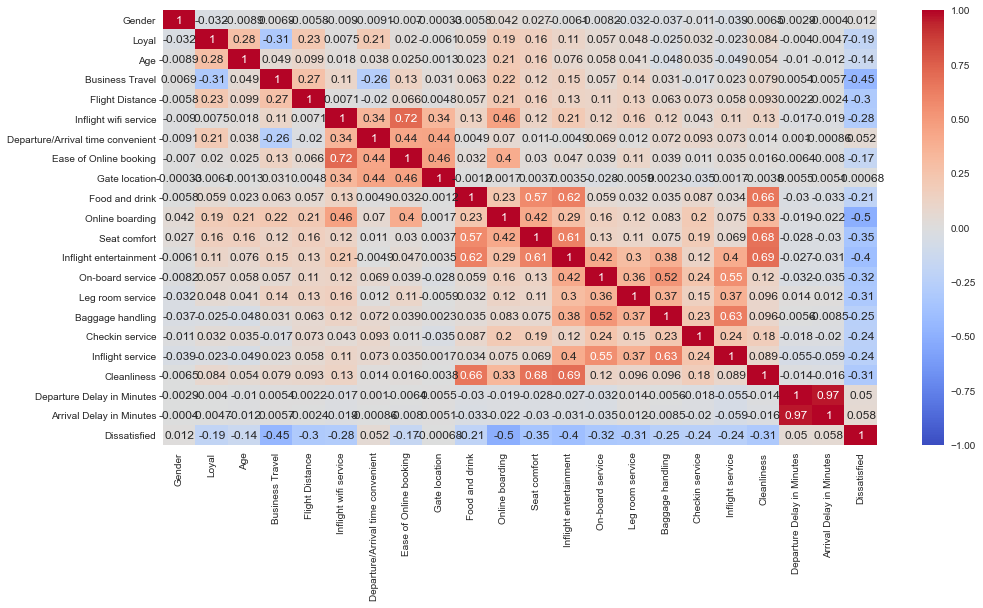

In [26]:
# Making a heatmap for the numeric data to understand how they correlate in pairs
plt.figure(figsize=(16,8))
sns.heatmap(airline_train.corr(),annot=True,cmap="coolwarm", vmin=-1)

As we can verify, there's only two columns that are very correlated with one another: `Departure Delay in Minutes` and `Arrival Delay in Minutes`, with more than 90% of correlation. **This will probably lead to multicollinearity problems.**

Therefore, it may be interesting to drop one of these columns in order to have the best prediction as possible.

I will choose to drop `Arrival Delay in Minutes` because of 2 reasons:
1. **It has 310 missing values** (opposed to `Departure Delay in Minutes` that has 0 `NaN` values)
2. **Hypothesis**: `Departure Delay in Minutes` cause more anxiety and stress because the delay is still unknown. Once the flight departs with delays, the customers had already the time to prevent other people that he is delayed and he has the whole flight duration to calm themselves and deal with the delay when arriving.

<AxesSubplot:>

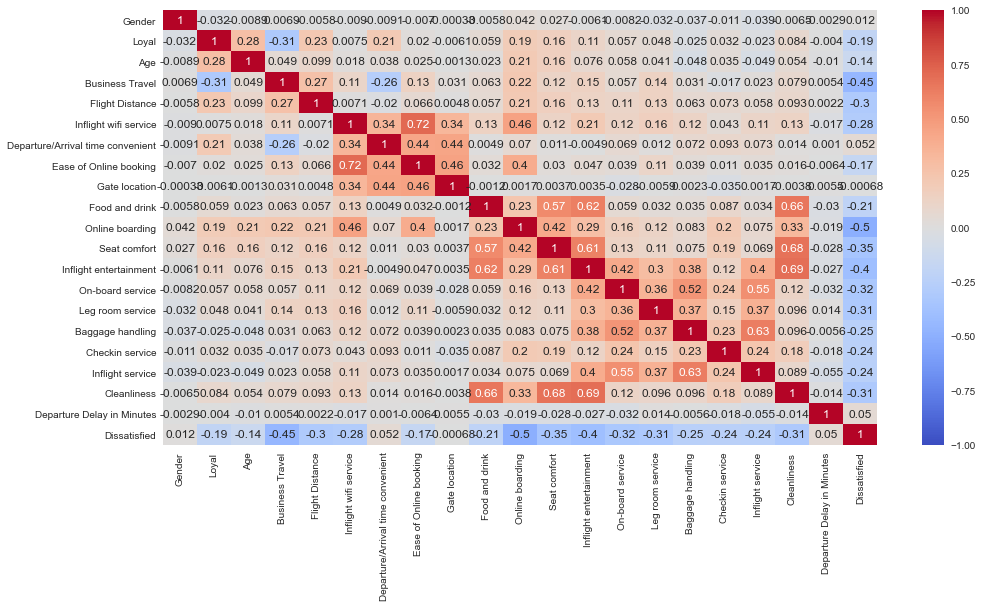

In [27]:
# Droping column "Arrival Delay in Minutes"
airline_train.drop(columns="Arrival Delay in Minutes", inplace=True)

# Printing the heatmap once again to verify that the multicollinearity problem
plt.figure(figsize=(16,8))
sns.heatmap(airline_train.corr(),annot=True,cmap="coolwarm", vmin=-1)

### Visualizing some more

Text(0.5, 1.0, 'Histogram of Ages')

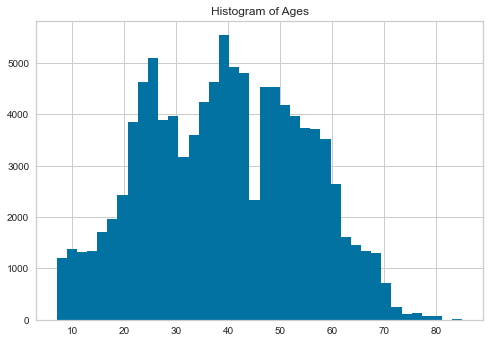

In [28]:
airline_train.Age.hist(bins=40)
plt.title("Histogram of Ages")

Text(0.5, 1.0, 'Histogram of Ages - MEN')

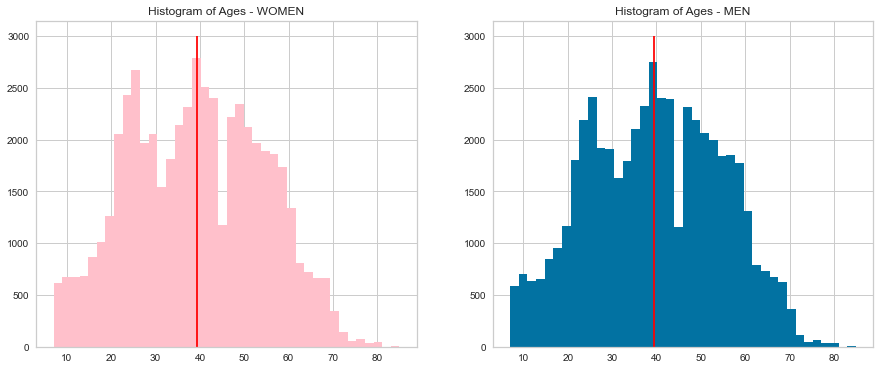

In [29]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.hist(airline_train[airline_train["Gender"]==1]["Age"],bins=40,color="pink")
ax1.vlines(airline_train[airline_train["Gender"]==1]["Age"].mean(),1,3000,color="red")
ax1.set_title("Histogram of Ages - WOMEN")

ax2.hist(airline_train[airline_train["Gender"]==0]["Age"],bins=40)
ax2.vlines(airline_train[airline_train["Gender"]==0]["Age"].mean(),1,3000,color="red")
ax2.set_title("Histogram of Ages - MEN")

Text(0.5, 1.0, 'Histogram of Flight Distance')

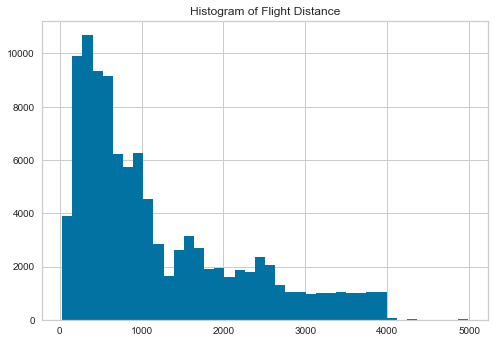

In [30]:
# Checking the distribution of Flight distance
airline_train["Flight Distance"].hist(bins=40)
plt.title("Histogram of Flight Distance")

The "Flight Distance" has a skewed distribution and may be needed to normalize in order to better work for the model.

MAXIMUM 'Flight Distance': 4983
MINIMUM 'Flight Distance': 31


{'whiskers': [<matplotlib.lines.Line2D at 0x12e3c6400>,
 'caps': [<matplotlib.lines.Line2D at 0x12e34d8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12e01dc40>],
 'medians': [<matplotlib.lines.Line2D at 0x12e55e9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12e56fe50>],
 'means': []}

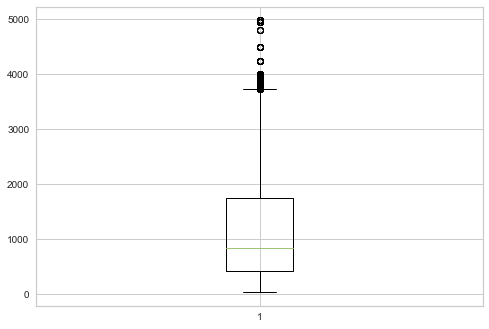

In [31]:
# Cheking outliers in "Flight Distance"
print("MAXIMUM 'Flight Distance':",airline_train["Flight Distance"].max())
print("MINIMUM 'Flight Distance':",airline_train["Flight Distance"].min())
plt.boxplot(airline_train["Flight Distance"],)

It seems that `"Flight Distance"` has also a lot of high ouliers. This should be corrected later.

MAXIMUM 'Departure Delay in Minutes': 1592
MINIMUM 'Departure Delay in Minutes': 0
58668


Text(0.5, 1.0, 'Histogram of Departure Delay in Minutes')

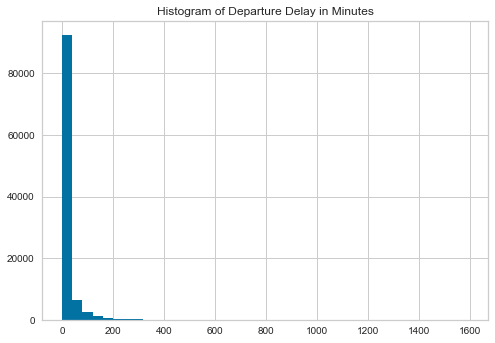

In [32]:
# Analyzing the 'Departure Delay in Minutes'
print("MAXIMUM 'Departure Delay in Minutes':",airline_train["Departure Delay in Minutes"].max())
print("MINIMUM 'Departure Delay in Minutes':",airline_train["Departure Delay in Minutes"].min())
print(airline_train["Departure Delay in Minutes"].value_counts().max())
airline_train["Departure Delay in Minutes"].hist(bins=40)
plt.title("Histogram of Departure Delay in Minutes")

This `Departure Delay in Minutes` distribution is the most skewed one, therefore it should be normalized.

MAXIMUM 'Departure Delay in Minutes': 1592
MINIMUM 'Departure Delay in Minutes': 0


{'whiskers': [<matplotlib.lines.Line2D at 0x12e731fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x12e7406a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12e634f70>],
 'medians': [<matplotlib.lines.Line2D at 0x12e740d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x12e74c100>],
 'means': []}

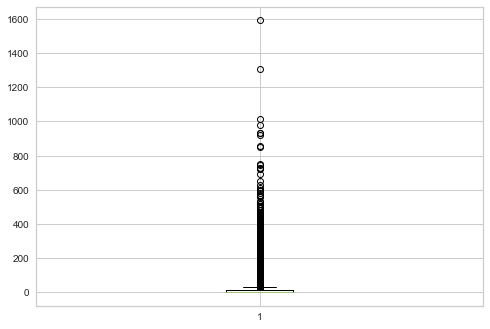

In [33]:
# Cheking outliers in "Departure Delay in Minutes"
print("MAXIMUM 'Departure Delay in Minutes':", airline_train["Departure Delay in Minutes"].max())
print("MINIMUM 'Departure Delay in Minutes':", airline_train["Departure Delay in Minutes"].min())
plt.boxplot(airline_train["Departure Delay in Minutes"])

(array([5.8668e+04, 0.0000e+00, 0.0000e+00, 2.9480e+03, 0.0000e+00,
        2.2740e+03, 0.0000e+00, 2.0090e+03, 1.8540e+03, 1.6920e+03,
        1.5170e+03, 2.6870e+03, 1.2550e+03, 3.2240e+03, 1.8620e+03,
        3.0200e+03, 1.9690e+03, 2.5880e+03, 2.5900e+03, 1.9280e+03,
        2.0810e+03, 1.8760e+03, 1.6760e+03, 1.3910e+03, 1.2210e+03,
        9.9300e+02, 7.7900e+02, 6.3700e+02, 4.7800e+02, 2.6400e+02,
        1.8100e+02, 1.2600e+02, 6.1000e+01, 2.9000e+01, 1.0000e+01,
        7.0000e+00, 2.0000e+00, 5.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([0.        , 0.18433436, 0.36866872, 0.55300307, 0.73733743,
        0.92167179, 1.10600615, 1.2903405 , 1.47467486, 1.65900922,
        1.84334358, 2.02767794, 2.21201229, 2.39634665, 2.58068101,
        2.76501537, 2.94934972, 3.13368408, 3.31801844, 3.5023528 ,
        3.68668715, 3.87102151, 4.05535587, 4.23969023, 4.42402459,
        4.60835894, 4.7926933 , 4.97702766, 5.16136202, 5.34569637,
        5.53003073, 5.71436509, 5.89869945, 6.

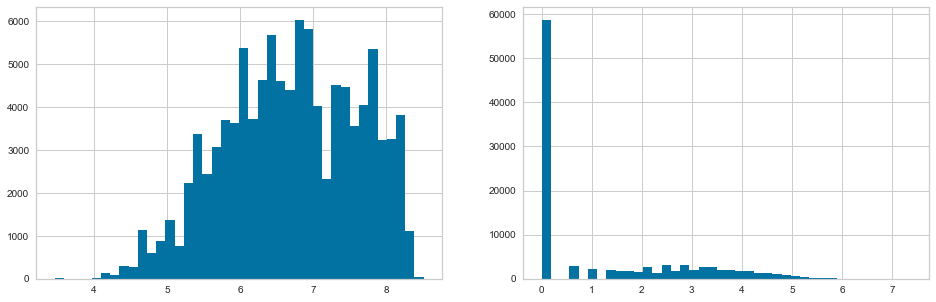

In [34]:
# Testing Feature Transformation, using the log of variables to see if I may end up with a normal distribution
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.hist(np.log(airline_train["Flight Distance"]+1),bins=40)
ax2.hist(np.log(airline_train["Departure Delay in Minutes"]+1),bins=40)

The feature transformation worked nicely for `Flight Distance`, specially because it has too many values in the hundreds kms and a few in the thousands.

But it didn't work properly for `Departure Delay in Minutes`. We may then look for another way to correct this.

## Cleaning with Features Transformation

In [35]:
# Creating a new DataFrame to store the transfomed database
airline_train_transf = airline_train.copy()

In [36]:
# Transforming "Flight Distance" into its own log, in order to have a normal distribution
airline_train_transf["Flight Distance"] = np.log(airline_train_transf["Flight Distance"]+1)

## Testing: Standardizing and Scaling Variables

`"Departure Delay in Minutes"` has too many 0 values and some values that goes until the thousands.

Given that the 1st case is the most extreme, I will conduct some test to treat `"Departure Delay in Minutes"` first.

In [37]:
airline_train_transf["Departure Delay in Minutes"].value_counts().sort_values(ascending=False)

0      58668
1       2948
2       2274
3       2009
4       1854
       ...  
444        1
329        1
579        1
314        1
447        1
Name: Departure Delay in Minutes, Length: 446, dtype: int64

### Testing the standardization first

In [38]:
# Analyzing the two previous variables standardized
from mlxtend.preprocessing import standardize

X = airline_train_transf["Departure Delay in Minutes"]

Y = pd.DataFrame(standardize(X))

print(Y.min())
print(Y.mean())
print(Y.max())
Y.sort_values(0)

0   -0.387532
dtype: float64
0   -3.720119e-17
dtype: float64
0    41.254377
dtype: float64


/usr/local/lib/python3.9/site-packages/mlxtend/preprocessing/scaling.py:107: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


,0
51951,-0.387532
57917,-0.387532
57919,-0.387532
57922,-0.387532
57924,-0.387532
...,...
6609,24.016928
62726,25.193992
3864,26.214114
55802,33.747324


Text(0.5, 1.0, 'Histogram of standardized values')

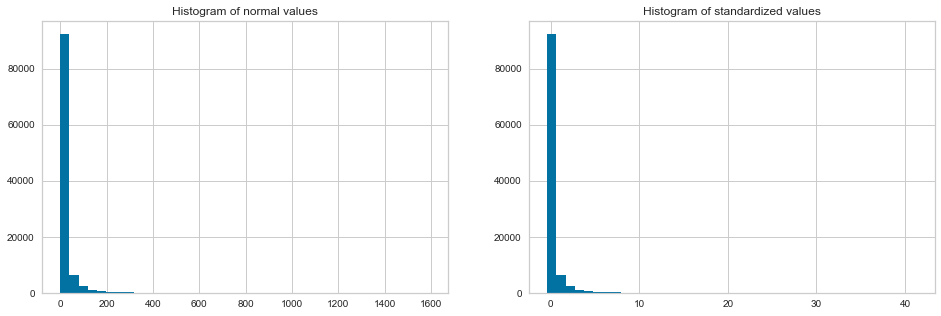

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.hist(X,bins=40)
ax1.set_title("Histogram of normal values")
ax2.hist(Y,bins=40)
ax2.set_title("Histogram of standardized values")

### Testing the normalizer

In [40]:
norm = Normalizer(X)
norm

Normalizer(norm=id
1          2
2         26
3          0
4          0
5          0
          ..
129874     0
129875     0
129878     6
129879    31
129880     0
Name: Departure Delay in Minutes, Length: 103904, dtype: int64)

### Testing the MinMaxScaler

In [41]:
# Analyzing the two previous variables scaled by MinMaxScaler
min_max_scaler = MinMaxScaler()
FD_DDM = airline_train_transf[['Flight Distance',"Departure Delay in Minutes"]].copy()
FD_DDM_scaled = pd.DataFrame( min_max_scaler.fit_transform(FD_DDM), columns=("Flight Distance","Departure Delay in Minutes") )
FD_DDM_scaled

,Flight Distance,Departure Delay in Minutes
0,0.642996,0.001256
1,0.642996,0.016332
2,0.650561,0.000000
3,0.809592,0.000000
4,0.928334,0.000000
...,...,...
103899,0.466956,0.000000
103900,0.449186,0.000000
103901,0.466956,0.003769
103902,0.466956,0.019472


Text(0.5, 1.0, 'Histogram of Departure Delay MinMaxScaled')

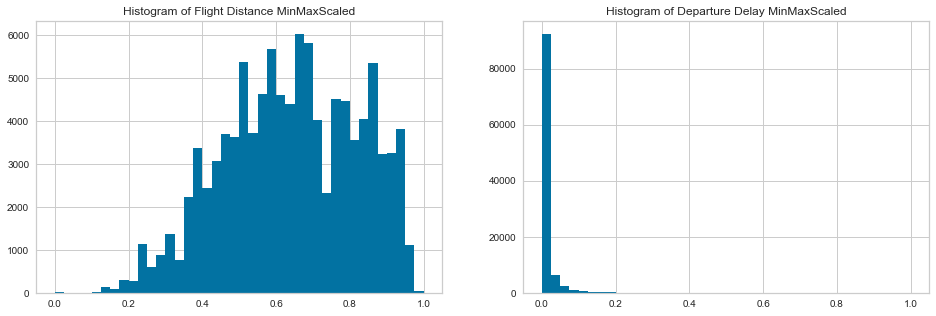

In [42]:
# Plotting histogram for new "Flight Distance"
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.hist(FD_DDM_scaled["Flight Distance"],bins=40)
ax1.set_title("Histogram of Flight Distance MinMaxScaled")
ax2.hist(FD_DDM_scaled["Departure Delay in Minutes"],bins=40)
ax2.set_title("Histogram of Departure Delay MinMaxScaled")

As we can see, all the treatments before didn't eliminate our outliers for `Departure Delay in Minutes`.

Plus, we don't want them to be eliminated since a delay of days are important to consider theur impact in the customer satisfaction.

In conclusion, **the best solution will be to create BINS for this variable.**

## Creating bins for `Departure Delay in Minutes`

I will try to create categories of equal stressed/upset people by considering intervals of their `Departure Delay`, assuming these interval comprehend equally levels of stress/deception for a delayed flight: 

- **No_delay**: up to 10min delay $\longrightarrow$ PERFECT SITUATION

- **10_to_40min_delay**: Delay from 10min to 40min $\longrightarrow$ acceptable delay but some stress and anxiety

- **41_to_120min_delay**: Delay from 21min to 60min $\longrightarrow$ significant stress and anxiety

- **121_240min_delay**: Delay from 61min to 3h $\longrightarrow$ high stress and anxiety bordeline intolerable

- **241_450min_delay**: Delay from 3h1min to 7,5h $\longrightarrow$ intolerable stress and anxiety

- **more_than_450min_delay**: Delay from 7,5h to 60min $\longrightarrow$ **not forgivable customer** with intolerable stress and anxiety because of lost of days of vacation, but they might already have the possibility to go home, go to the hotel or have a walk at the city before coming back to the airport

In [43]:
def delay_transformation(x):
    if x<=10:
        x = "less_than_10min"
    elif x<=40:
        x = "10_to_40min"
    elif x<=120:
        x = "41_to_120min"
    elif x<=240:
        x = "121_240min"
    elif x<=450:
        x = "241_450min"
    else:
        x = "more_than_450min"

    return x

hide_toggle()

In [44]:
# Testing the transformation to understand the sizes of our bins
airline_train_transf["Departure Delay in Minutes"].apply(delay_transformation).value_counts()/airline_train_transf.shape[0]

less_than_10min     0.731935
10_to_40min         0.159840
41_to_120min        0.083779
121_240min          0.019845
241_450min          0.004129
more_than_450min    0.000472
Name: Departure Delay in Minutes, dtype: float64

In [45]:
# Applying the previous transformation
airline_train_transf["Departure Delay in Minutes"] = airline_train_transf["Departure Delay in Minutes"].apply(delay_transformation)

# Renaming the column for something more succint
airline_train_transf.rename(columns={"Departure Delay in Minutes":"Departure_Delay"},inplace=True)

## Creating dummies for the categorical variables

In [46]:
airline_train_transf.dtypes

Gender                                 int64
Loyal                                  int64
Age                                    int64
Business Travel                        int64
Class                                 object
Flight Distance                      float64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure_Delay                       object
Dissatisfied                           int64
dtype: obj

After all the cleaning, there's only 2 categorical variables to treat: `Class` and `Departure Delay in Minutes`

In [47]:
pd.options.display.max_columns=40
pd.get_dummies(airline_train_transf, columns=["Class","Departure_Delay"],drop_first=True)

,Gender,Loyal,Age,Business Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Dissatisfied,Class_Eco,Class_Eco Plus,Departure_Delay_121_240min,Departure_Delay_241_450min,Departure_Delay_41_to_120min,Departure_Delay_less_than_10min,Departure_Delay_more_than_450min
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,48,1,6.711740,3,3,3,3,5,3,5,5,3,2,5,4,5,5,1,0,0,0,0,0,1,0
2,1,1,35,1,6.711740,2,2,2,2,3,5,4,5,5,5,5,3,5,5,0,0,0,0,0,0,0,0
3,0,1,41,1,6.749931,4,4,4,4,5,5,5,3,3,3,3,4,3,5,0,0,0,0,0,0,1,0
4,0,1,50,1,7.552762,2,2,2,2,4,4,5,5,5,5,5,3,5,4,0,0,0,0,0,0,1,0
5,1,1,49,1,8.152198,3,3,3,3,4,5,4,3,3,4,3,3,3,5,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,1,1,28,0,5.823046,4,2,4,4,3,4,3,3,1,5,3,4,4,3,1,0,1,0,0,0,1,0
129875,1,1,55,0,5.733341,3,4,3,4,2,4,3,4,4,3,4,4,4,4,1,0,1,0,0,0,1,0
129878,0,1,42,0,5.823046,2,5,2,1,3,2,3,3,3,4,5,4,4,3,1,0,1,0,0,0,1,0


In [48]:
airline_train_transf = pd.get_dummies(airline_train_transf, columns=["Class","Departure_Delay"],drop_first=True)

## Features scaling

Let's scale our 2 continuos variables: `Age` and `Flight Distance`.

In [49]:
airline_train_transf.loc[:,["Age","Flight Distance"]] = StandardScaler().fit_transform(airline_train_transf.loc[:,["Age","Flight Distance"]])

Let's also scale our categorical variables related to the satisfaction to each different aspect of the customer service.

In [50]:
airline_train_transf.loc[:,"Inflight wifi service":"Cleanliness"] = StandardScaler().fit_transform(airline_train_transf.loc[:,"Inflight wifi service":"Cleanliness"])

In [51]:
airline_train_transf

,Gender,Loyal,Age,Business Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Dissatisfied,Class_Eco,Class_Eco Plus,Departure_Delay_121_240min,Departure_Delay_241_450min,Departure_Delay_41_to_120min,Departure_Delay_less_than_10min,Departure_Delay_more_than_450min
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0.570318,1,0.006711,0.203579,-0.039537,0.173776,0.018094,1.352264,-0.185532,1.183099,1.231704,-0.296785,-1.026951,1.158582,0.549799,1.156436,1.305870,1,0,0,0,0,0,1,0
2,1,1,-0.289761,1,0.006711,-0.549533,-0.695245,-0.541060,-0.764614,-0.152031,1.296496,0.424996,1.231704,1.255590,1.253380,1.158582,-0.240472,1.156436,1.305870,0,0,0,0,0,0,0,0
3,0,1,0.107199,1,0.048423,0.956691,0.616172,0.888612,0.800803,1.352264,1.296496,1.183099,-0.268688,-0.296785,-0.266840,-0.535045,0.549799,-0.544740,1.305870,0,0,0,0,0,0,1,0
4,0,1,0.702638,1,0.925273,-0.549533,-0.695245,-0.541060,-0.764614,0.600117,0.555482,1.183099,1.231704,1.255590,1.253380,1.158582,-0.240472,1.156436,0.543829,0,0,0,0,0,0,1,0
5,1,1,0.636478,1,1.579975,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,0.424996,-0.268688,-0.296785,0.493270,-0.535045,-0.240472,-0.544740,1.305870,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,1,1,-0.752880,0,-0.963918,0.956691,-0.695245,0.888612,0.800803,-0.152031,0.555482,-0.333108,-0.268688,-1.849161,1.253380,-0.535045,0.549799,0.305848,-0.218211,1,0,1,0,0,0,1,0
129875,1,1,1.033437,0,-1.061894,0.203579,0.616172,0.173776,0.800803,-0.904178,0.555482,-0.333108,0.481508,0.479403,-0.266840,0.311769,0.549799,0.305848,0.543829,1,0,1,0,0,0,1,0
129878,0,1,0.173358,0,-0.963918,-0.549533,1.271880,-0.541060,-1.547323,-0.152031,-0.926545,-0.333108,-0.268688,-0.296785,0.493270,1.158582,0.549799,0.305848,-0.218211,1,0,1,0,0,0,1,0


## Feature Selection

In [52]:
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector

In [53]:
knn = KNeighborsClassifier(n_neighbors=3)

In [54]:
X = airline_train_transf.drop(columns="Dissatisfied").copy()
Y = airline_train_transf["Dissatisfied"].copy()

#### Applying SFS

Takes too long to run, so I have deliberatly chose not to do the feature selection. After all, 28 columns (including dummies) are not that much.

#### The feature selection is very very slow in this dataset

## Principal Components Analysis (PCA)

The objective here is to simplify the dataset into a smaller dataset, compressing the 27 columns into a limited number of components (ncomp).

In [55]:
# Creating PCA model:
def pca_transformation(df, n):
    pca_model = PCA(n_components=n)
    
    df = pca_model.fit_transform(df)
    
    columns_list = []
    for i in range(1,n+1):
        columns_list.append("PC"+str(i))
    
    df = pd.DataFrame(df, columns=columns_list)
    
    return df

In [56]:
airline_train_pca = pca_transformation(airline_train_transf, 3)

In [57]:
airline_train_pca

,PC1,PC2,PC3
0,-2.164669,0.840111,0.666210
1,-2.382192,1.707433,-1.124006
2,-1.827049,-1.187570,2.130724
3,-2.575233,1.915383,-0.909173
4,-1.190357,-0.111191,1.507287
...,...,...,...
103899,0.246861,-1.304593,0.260776
103900,-0.567124,-0.811055,-0.420980
103901,0.465945,0.739271,-1.269016
103902,-1.321502,-0.850713,-0.968094


## Compiling work cleaning, features transformations and PCA in functions, in order to simplify the use later for the `TEST` dataset or for reinitializing the `TRAIN` dataset

In [154]:
def transform_dataset(df, clean=True, transform=True, scaler=True):
    
    if clean==True:
        # Droping column "Unnamed: 0" because it doesn't bring important information
        df.drop(columns="Unnamed: 0", inplace=True)

        # Reseting index for "id" since these values are unique for each row:
        df.set_index("id", inplace=True)

        # Gender: 1 for Female and 0 for Male
        df.Gender = df.Gender.apply(lambda x: 1 if x=="Female" else 0)

        # Sorting by the index, in order to have a cleaner structure
        df.sort_values(by="id",inplace=True)

        # Cleaning column "Customer Type" to indicate only if customer is loyal or not
        df.rename(columns={"Customer Type":"Loyal"}, inplace=True)
        df["Loyal"] = df["Loyal"].apply(lambda x: 1 if x=='Loyal Customer' else 0)

        # Cleaning column "Satisfaction" to indicate only if customer was satisfied or not
        df.rename(columns={"satisfaction":"Dissatisfied"}, inplace=True)
        df["Dissatisfied"] = df["Dissatisfied"].apply(lambda x: 1 if x=='neutral or dissatisfied' else 0)

        # Cleaning column "Type of Travel" to indicate only is a Business Traveler or not
        df.rename(columns={'Type of Travel':"Business Travel"}, inplace=True)
        df["Business Travel"] = df["Business Travel"].apply(lambda x: 1 if x=='Business travel' else 0)
    
    if transform == True:
        # Transforming "Flight Distance" into its own log, in order to have a normal distribution
        df["Flight Distance"] = np.log(df["Flight Distance"]+1)

        # Applying the delay_transformation function
        df["Departure Delay in Minutes"] = df["Departure Delay in Minutes"].apply(delay_transformation)
    
        # Renaming the column for something more succint
        df.rename(columns={"Departure Delay in Minutes":"Departure_Delay"},inplace=True)

        # Droping column "Arrival Delay in Minutes"
        df.drop(columns="Arrival Delay in Minutes", inplace=True)

        # Creating dummies for the 2 categorical columns remaining "Class" and "Departure_Delay"
        df = pd.get_dummies(df, columns=["Class","Departure_Delay"],drop_first=True)
     
    if scaler==True:
        # Scaling the continuos variables: `Age` and `Flight Distance`.
        df.loc[:,["Age","Flight Distance"]] = StandardScaler().fit_transform(df.loc[:,["Age","Flight Distance"]])
        
        # Scaling our categorical variables related to the satisfaction to each different aspect of the customer service
        df.loc[:,"Inflight wifi service":"Cleanliness"] = StandardScaler().fit_transform(df.loc[:,"Inflight wifi service":"Cleanliness"])
    
    return df
    
hide_toggle()

## `TEST` dataset

Finally, we may use our `TEST` dataset, in order to predict the customer satisfaction based on the client's usage of the service.

In [59]:
airline_test = pd.read_csv("data/airline-test.csv")
print(airline_test.shape)
airline_test.head(5)

(25976, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [60]:
airline_test.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [61]:
airline_test.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


As on the `TRAIN` dataset, the `TEST` dataset only has missing values on the `Arrival Delay in Minutes`, approving the use of all the transform_dataset function created before.

## Models Creation and Prediction

Given that the `TRAIN` and `TEST` datasets were given there's no need to generate these samples by spliting of a whole dataset. Therefore, let's just reinitialise the datasets, re-run the 'cleaning' function and split the dataset in X and Y.

### `TRAIN` Dataset

Reinitializing, cleaning and transforming the `TRAIN` dataset:

In [62]:
airline_train_transf = transform_dataset(pd.read_csv("data/airline-train.csv"))

Splitting `TRAIN` dataset into **X (features)** and **Y (target)**:

In [63]:
# Transforming with PCA
#X_airline_train = pca_transformation(airline_train_transf.drop(columns='Dissatisfied').copy(),6)
# Without PCA
X_airline_train = airline_train_transf.drop(columns='Dissatisfied').copy()

print(X_airline_train.shape)

Y_airline_train = airline_train_transf['Dissatisfied'].copy()
print(Y_airline_train.shape)

(103904, 26)
(103904,)


In [64]:
# Counting the repartition of target variables:
Y_airline_train.value_counts()/Y_airline_train.shape[0]

1    0.566667
0    0.433333
Name: Dissatisfied, dtype: float64

### `TEST` Dataset

Reinitializing, cleaning and transforming the `TEST` dataset:

In [65]:
airline_test_transf = transform_dataset(pd.read_csv("data/airline-test.csv"))

Splitting `TEST` dataset into **X (features)** and **Y (target)**:

In [66]:
# Transforming with PCA
#X_airline_test = pca_transformation(airline_test_transf.drop(columns='Dissatisfied').copy(),6)
# Without PCA
X_airline_test = airline_test_transf.drop(columns='Dissatisfied').copy()

print(X_airline_test.shape)

Y_airline_test = airline_test_transf['Dissatisfied'].copy()
print(Y_airline_test.shape)

(25976, 26)
(25976,)


In [67]:
Y_airline_test.value_counts()/Y_airline_test.shape[0]

1    0.561018
0    0.438982
Name: Dissatisfied, dtype: float64

For this exercice, let's use 3 different models and see which one performs better:

1. **Logistic Regression**
2. **K Nearest Neighbors**
3. **Catboost**

### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
# Model creation
log_model = LogisticRegression(max_iter = 1e5)

# Model fitting for our TRAIN dataset
log_model.fit(X_airline_train, Y_airline_train)

LogisticRegression(max_iter=100000.0)

In [70]:
# Predicting results for the test sample
Y_pred_log = log_model.predict(X_airline_test)

In [71]:
# PRINTING THE RESULTS: confusion matrix, accuracy score, precision score, recall score and f1_score
display(pd.DataFrame(confusion_matrix(Y_airline_test,Y_pred_log),
             columns=["Y_pred_satisfied","Y_pred_dissatisfied"],
             index=["Y_satisfied","Y_dissatisfied"],))
print()
print(f"Accuracy score: {accuracy_score(Y_airline_test, Y_pred_log)*100:0.1f}%")
print(f"Precision score: {precision_score(Y_airline_test, Y_pred_log)*100:0.1f}%")
print(f"Recall score: {recall_score(Y_airline_test, Y_pred_log)*100:0.1f}%")
print(f"F1 score: {f1_score(Y_airline_test, Y_pred_log)*100:0.1f}%")

,Y_pred_satisfied,Y_pred_dissatisfied
Y_satisfied,9487,1916
Y_dissatisfied,1430,13143



Accuracy score: 87.1%
Precision score: 87.3%
Recall score: 90.2%
F1 score: 88.7%


As we can see, the model has a good performance, with 87% accuracy.

However, there's a high number of False positive: 1441 (representing 13,2% of dissatisfied customers predicted).

Nevertheless what really matter is the `False Negative` because they might be clients that may churn.

This segment represents: 1903 clients.

<AxesSubplot:>

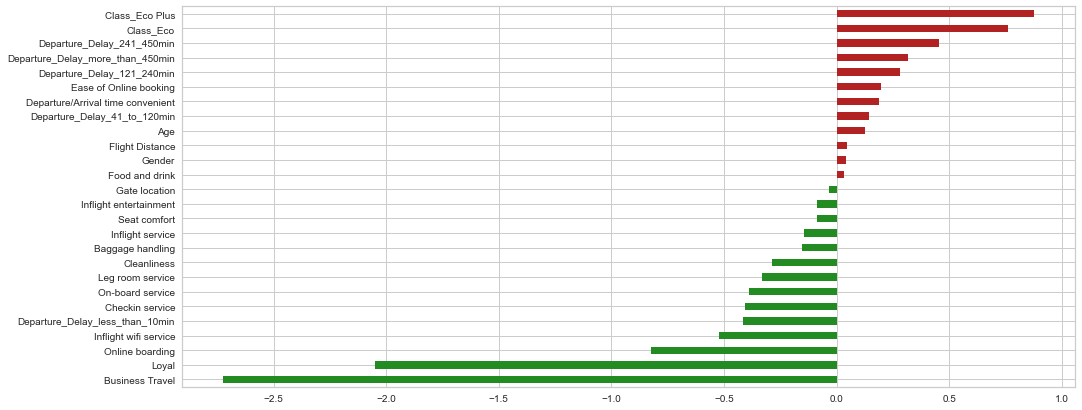

In [72]:
# Summarizing the most import attributes considered by this logistic regression
my_color = pd.Series(log_model.coef_[0]>0).sort_values(ascending=True)
pd.Series(log_model.coef_[0],index=X_airline_train.columns).sort_values(ascending=True).plot.barh(figsize=(16,7), color=my_color.map({True: 'firebrick', False: 'forestgreen'}))

[learning_curve] Training set sizes: [ 7792 15585 23378 31171 38964 46756 54549 62342 70135 77928]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   16.9s finished


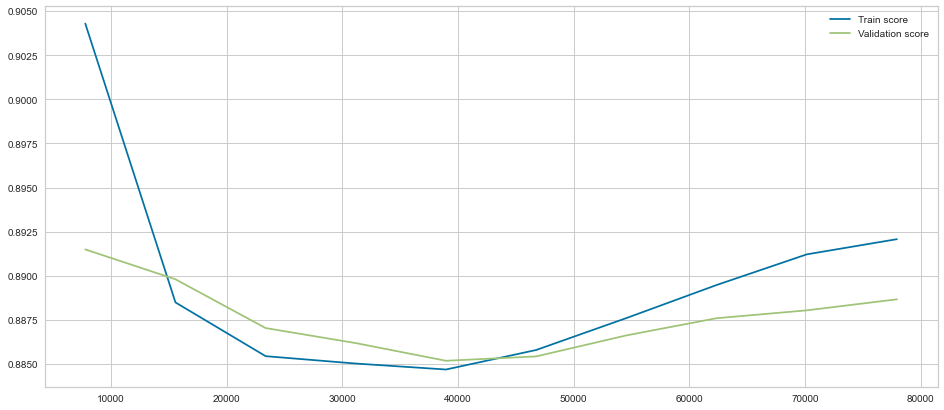

In [73]:
N, train_score, val_score = learning_curve(log_model,
                                           X_airline_train, Y_airline_train, cv=4, scoring='f1',
                                          train_sizes=np.linspace(0.1, 1,10),
                                          verbose=1)
plt.figure(figsize=(16,7))
plt.plot(N, train_score.mean(axis=1), label="Train score")
plt.plot(N, val_score.mean(axis=1), label="Validation score")
plt.legend()

### K Nearest Neighbors

In [74]:
# Model creation
knn_model = KNeighborsClassifier(3)

# Model fitting for our training dataset
knn_model.fit(X_airline_train, Y_airline_train)

KNeighborsClassifier(n_neighbors=3)

In [75]:
# Predicting dissatisfied customers
Y_pred_knn = knn_model.predict(X_airline_test)

In [76]:
# PRINTING THE RESULTS: confusion matrix, accuracy score, precision score, recall score and f1_score
display(pd.DataFrame(confusion_matrix(Y_airline_test,Y_pred_knn),
             columns=["Y_pred_satisfied","Y_pred_dissatisfied"],
             index=["Y_satisfied","Y_dissatisfied"],))
print()
print(f"Accuracy score: {accuracy_score(Y_airline_test, Y_pred_knn)*100:0.1f}%")
print(f"Precision score: {precision_score(Y_airline_test, Y_pred_knn)*100:0.1f}%")
print(f"Recall score: {recall_score(Y_airline_test, Y_pred_knn)*100:0.1f}%")
print(f"F1 score: {f1_score(Y_airline_test, Y_pred_knn)*100:0.1f}%")

,Y_pred_satisfied,Y_pred_dissatisfied
Y_satisfied,10215,1188
Y_dissatisfied,705,13868



Accuracy score: 92.7%
Precision score: 92.1%
Recall score: 95.2%
F1 score: 93.6%


This model is more performing than the previous one, with more precision and accuracy.

Therefore, significant less `False Negatives`.

### Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
# Model creation
decisiontree_model = DecisionTreeClassifier()

# Model fitting for our training dataset
decisiontree_model.fit(X_airline_train, Y_airline_train)

# Predicting dissatisfied customers
Y_pred_decisiontree = decisiontree_model.predict(X_airline_test)

In [79]:
# PRINTING THE RESULTS: confusion matrix, accuracy score, precision score, recall score and f1_score
display(pd.DataFrame(confusion_matrix(Y_airline_test,Y_pred_decisiontree,normalize='all'),
             columns=["Y_pred_satisfied","Y_pred_dissatisfied"],
             index=["Y_satisfied","Y_dissatisfied"],))
print()
print(f"Accuracy score: {accuracy_score(Y_airline_test, Y_pred_decisiontree)*100:0.1f}%")
print(f"Precision score: {precision_score(Y_airline_test, Y_pred_decisiontree)*100:0.1f}%")
print(f"Recall score: {recall_score(Y_airline_test, Y_pred_decisiontree)*100:0.1f}%")
print(f"F1 score: {f1_score(Y_airline_test, Y_pred_decisiontree)*100:0.1f}%")

,Y_pred_satisfied,Y_pred_dissatisfied
Y_satisfied,0.412612,0.026370
Y_dissatisfied,0.029412,0.531606



Accuracy score: 94.4%
Precision score: 95.3%
Recall score: 94.8%
F1 score: 95.0%


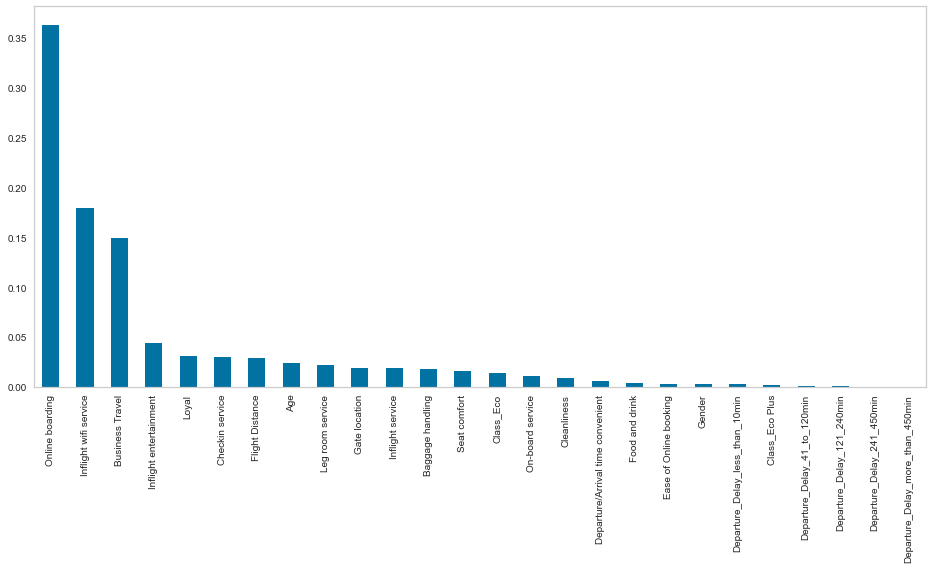

In [80]:
# Summarizing the most import attributes considered by the decision tree classification
ax = pd.Series(decisiontree_model.feature_importances_,index=X_airline_train.columns).sort_values(ascending=False).plot.bar(figsize=(16,7))
ax.grid(False)

Looking at the maximum depth to understand if our model is overfitting:

In [81]:
print(decisiontree_model.tree_.max_depth)

36


The previous number is very high and makes me worry with overfitting problems. Therefore, I will limit the `max_depth` to **15 levels**.

In [82]:
# Model creation
decisiontree_model = DecisionTreeClassifier(max_depth=15)

# Model fitting for our training dataset
decisiontree_model.fit(X_airline_train, Y_airline_train)

# Predicting dissatisfied customers
Y_pred_decisiontree = decisiontree_model.predict(X_airline_test)

# PRINTING THE RESULTS: confusion matrix, accuracy score, precision score, recall score and f1_score
display(pd.DataFrame(confusion_matrix(Y_airline_test,Y_pred_decisiontree),
             columns=["Y_pred_satisfied","Y_pred_dissatisfied"],
             index=["Y_satisfied","Y_dissatisfied"],))
print()
print(f"Accuracy score: {accuracy_score(Y_airline_test, Y_pred_decisiontree)*100:0.1f}%")
print(f"Precision score: {precision_score(Y_airline_test, Y_pred_decisiontree)*100:0.1f}%")
print(f"Recall score: {recall_score(Y_airline_test, Y_pred_decisiontree)*100:0.1f}%")
print(f"F1 score: {f1_score(Y_airline_test, Y_pred_decisiontree)*100:0.1f}%")

,Y_pred_satisfied,Y_pred_dissatisfied
Y_satisfied,10686,717
Y_dissatisfied,517,14056



Accuracy score: 95.2%
Precision score: 95.1%
Recall score: 96.5%
F1 score: 95.8%


We may see that our model has improved its overall scores.

#### The decision tree model worked neatly and so far has been the best model. This can be explained by the fact that the database contains a lot of categorical variables, being the perfect case for applying this model. However this model can be slower and can produce overfitting.

[learning_curve] Training set sizes: [ 7792 15585 23378 31171 38964 46756 54549 62342 70135 77928]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   10.3s finished


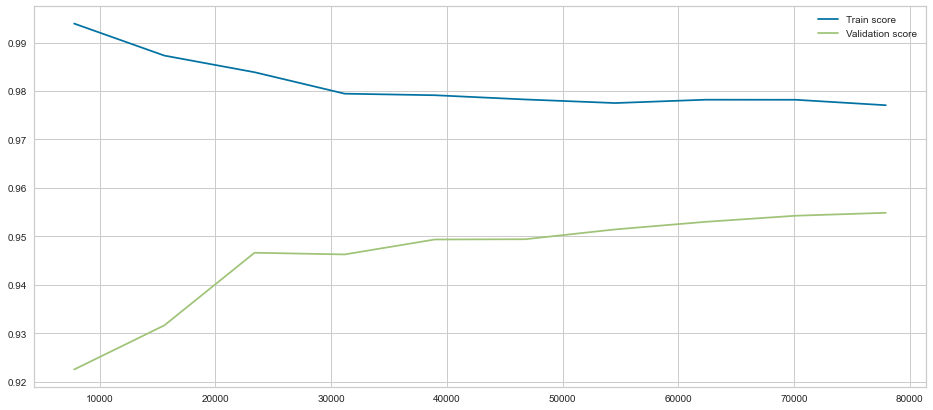

In [83]:
N, train_score, val_score = learning_curve(decisiontree_model,
                                           X_airline_train, Y_airline_train, cv=4, scoring='f1',
                                          train_sizes=np.linspace(0.1, 1,10),
                                          verbose=1)
plt.figure(figsize=(16,7))
plt.plot(N, train_score.mean(axis=1), label="Train score")
plt.plot(N, val_score.mean(axis=1), label="Validation score")
plt.legend()

In [84]:
decisiontree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

## Clustering

Considering that we have more than **100k datapoints**, the number of models that we can use are limited.

Therefore, let's ignore "Affinity Propagation", "Agglomerative", "Spectral".

And let's use: **K-means** (Sklearn or Scipy) and **DBSCAN** (from Sklearn as well).

### Preparing the dataset once again

In [159]:
X_airline_train = transform_dataset(pd.read_csv("data/airline-train.csv").copy()).drop("Dissatisfied",axis=1)

# Applying PCA without target column
X_airline_train = pca_transformation(X_airline_train, 6)

Y_airline_train = transform_dataset(pd.read_csv("data/airline-train.csv"))["Dissatisfied"]

In [160]:
X_airline_train.shape

(103904, 6)

### Kmeans Clustering

In [161]:
from sklearn.cluster import KMeans

In [185]:
# Creation of the model
kmeans_model = KMeans(n_clusters=5)

# Fitting the model
kmeans_model.fit(X_airline_train)

KMeans(n_clusters=5)

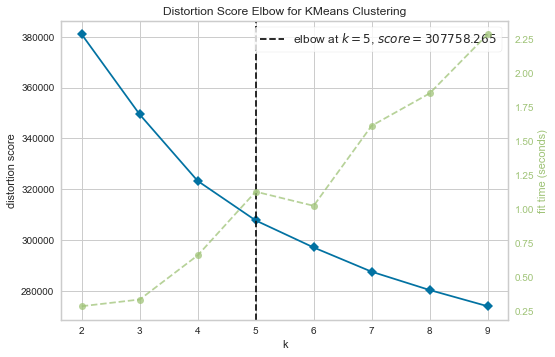

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [170]:
from yellowbrick.cluster import KElbowVisualizer

# Visualizing the elbow choosing the best number of clusters
visualizer=KElbowVisualizer(kmeans_model, k=(2,10))#, metric='silhouette')
visualizer.fit(airline_test_transf)
visualizer.poof()

In [184]:
# Obtaining the clusters
kmeans_model.labels_

25976

In [164]:
len(kmeans_model.labels_)

103904

In [165]:
# Number of clusters
print("Number of clusters defined:", len(set(kmeans_model.labels_)))

Number of clusters defined: 5


In [166]:
# Creating a new clean (but not transformed) dataset with each cluster
airline_train_cluster = transform_dataset(pd.read_csv("data/airline-train.csv"),transform=False,scaler=False)

airline_train_cluster["Cluster_KMeans"] = kmeans_model.labels_

airline_train_cluster

,Gender,Loyal,Age,Business Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Dissatisfied,Cluster_KMeans
id,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,48,1,Business,821,3,3,3,3,5,3,5,5,3,2,5,4,5,5,2,5.0,1,1
2,1,1,35,1,Business,821,2,2,2,2,3,5,4,5,5,5,5,3,5,5,26,39.0,0,2
3,0,1,41,1,Business,853,4,4,4,4,5,5,5,3,3,3,3,4,3,5,0,0.0,0,3
4,0,1,50,1,Business,1905,2,2,2,2,4,4,5,5,5,5,5,3,5,4,0,0.0,0,2
5,1,1,49,1,Business,3470,3,3,3,3,4,5,4,3,3,4,3,3,3,5,0,1.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,1,1,28,0,Eco Plus,337,4,2,4,4,3,4,3,3,1,5,3,4,4,3,0,0.0,1,3
129875,1,1,55,0,Eco Plus,308,3,4,3,4,2,4,3,4,4,3,4,4,4,4,0,0.0,1,3
129878,0,1,42,0,Eco Plus,337,2,5,2,1,3,2,3,3,3,4,5,4,4,3,6,14.0,1,1


In [167]:
# Looking at the different clusters created:
airline_train_cluster.groupby("Cluster_KMeans").mean()

,Gender,Loyal,Age,Business Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Dissatisfied
Cluster_KMeans,,,,,,,,,,,,,,,,,,,,,,
0,0.458203,0.689209,32.841793,0.573502,896.193042,2.356375,3.037284,2.581712,2.961355,1.626208,2.277453,1.732027,1.797614,3.210097,3.259582,3.680455,3.022452,3.694743,1.605298,17.490860,18.050159,0.847508
1,0.490360,0.652543,30.642232,0.475646,664.808657,2.060040,2.825036,1.835777,2.882391,4.018850,2.146286,3.839160,4.066162,3.259599,3.017937,3.709468,3.132163,3.744536,4.023951,12.775844,13.193536,0.858063
2,0.512720,0.952985,45.453638,0.916053,1797.543750,2.121611,1.987306,2.030507,1.912605,3.588414,4.117119,4.220289,4.348796,4.279737,4.158805,4.332080,3.840046,4.338766,3.915948,13.911613,14.021475,0.154156
3,0.504530,0.873311,41.177413,0.795041,1354.471240,4.176038,4.168716,4.155813,3.950368,3.711067,4.120055,4.025847,4.153992,3.939730,3.859518,4.110549,3.621269,4.127700,3.869226,13.650311,13.815500,0.263975
4,0.578494,0.916008,46.923236,0.669196,1215.995870,2.553301,2.958391,2.774250,2.894740,3.179392,3.452584,3.478189,2.459037,2.098291,2.328223,2.198906,2.856538,2.166538,3.124516,16.112178,16.703188,0.760880


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


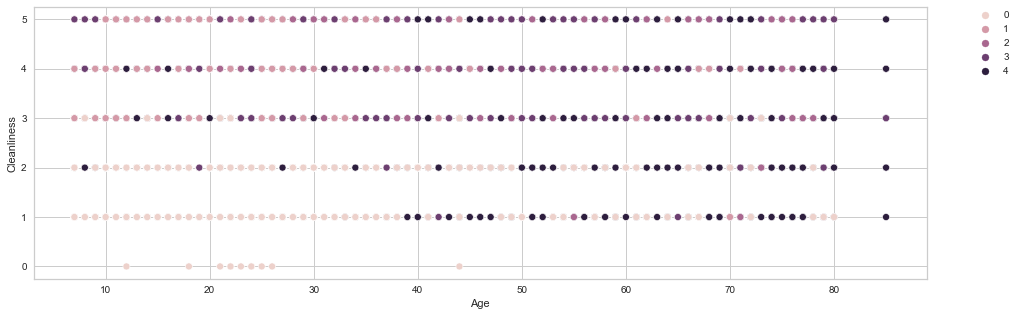

In [168]:
plt.figure(figsize=(16,5))
sns.scatterplot(airline_train_cluster["Age"],airline_train_cluster["Cleanliness"], hue=airline_train_cluster["Cluster_KMeans"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


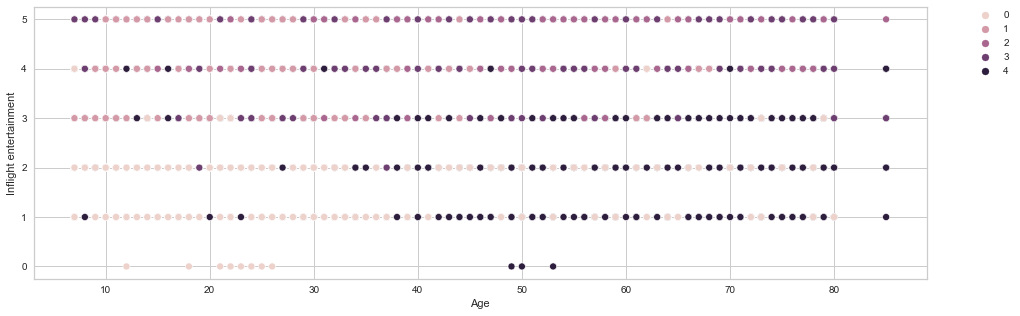

In [169]:
plt.figure(figsize=(16,5))
sns.scatterplot(airline_train_cluster["Age"],airline_train_cluster["Inflight entertainment"], hue=airline_train_cluster["Cluster_KMeans"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

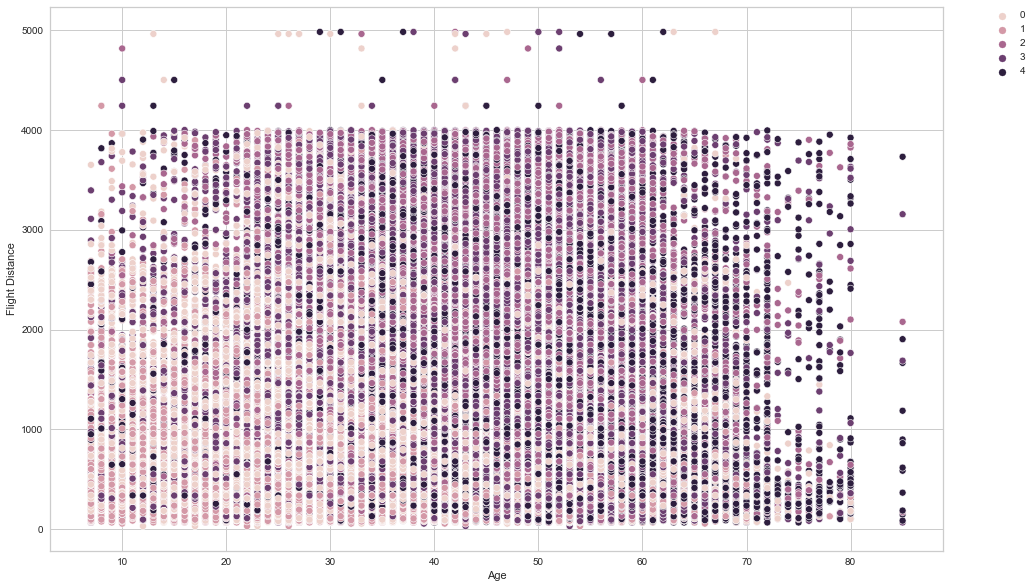

In [171]:
# Visualizing my clusters
plt.figure(figsize=(16,10))
sns.scatterplot(data=airline_train_cluster, x="Age",y="Flight Distance",hue="Cluster_KMeans")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<Figure size 1152x1152 with 0 Axes>

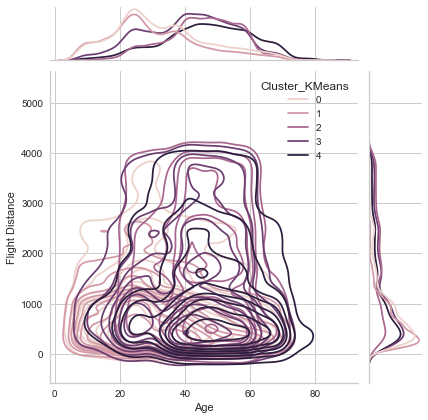

In [172]:
plt.figure(figsize=(16,16))
sns.jointplot(data=airline_train_cluster, x="Age",y="Flight Distance",hue="Cluster_KMeans", kind='kde')

<Figure size 1152x1152 with 0 Axes>

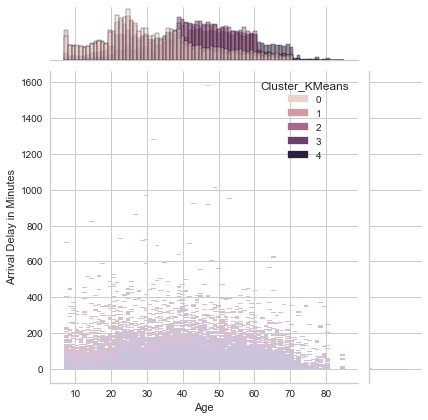

In [173]:
plt.figure(figsize=(16,16))
sns.jointplot(data=airline_train_cluster, x="Age",y="Arrival Delay in Minutes",hue="Cluster_KMeans", kind='hist')

In [174]:
airline_train_cluster.columns

Index(['Gender', 'Loyal', 'Age', 'Business Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Dissatisfied', 'Cluster_KMeans'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Departure Delay in Minutes'>

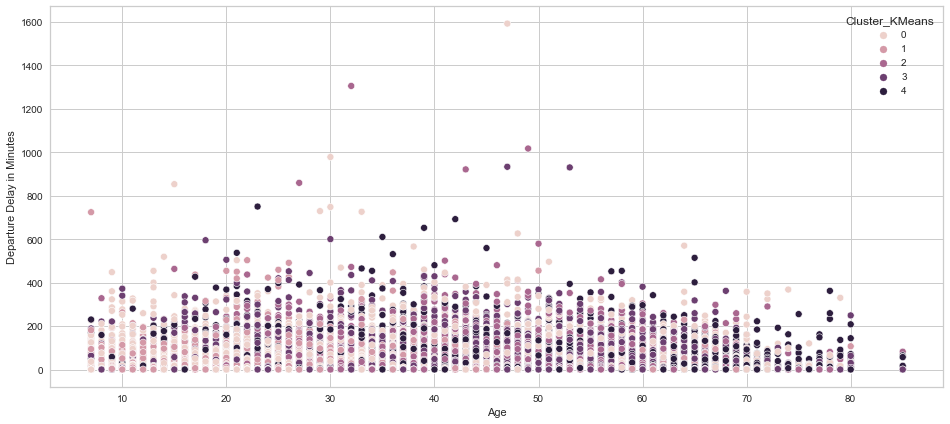

In [175]:
# Visualizing my clusters
plt.figure(figsize=(16,7))
sns.scatterplot(data=airline_train_cluster, y="Departure Delay in Minutes",x="Age",hue="Cluster_KMeans")

In [176]:
airline_train_cluster

,Gender,Loyal,Age,Business Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Dissatisfied,Cluster_KMeans
id,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,48,1,Business,821,3,3,3,3,5,3,5,5,3,2,5,4,5,5,2,5.0,1,1
2,1,1,35,1,Business,821,2,2,2,2,3,5,4,5,5,5,5,3,5,5,26,39.0,0,2
3,0,1,41,1,Business,853,4,4,4,4,5,5,5,3,3,3,3,4,3,5,0,0.0,0,3
4,0,1,50,1,Business,1905,2,2,2,2,4,4,5,5,5,5,5,3,5,4,0,0.0,0,2
5,1,1,49,1,Business,3470,3,3,3,3,4,5,4,3,3,4,3,3,3,5,0,1.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,1,1,28,0,Eco Plus,337,4,2,4,4,3,4,3,3,1,5,3,4,4,3,0,0.0,1,3
129875,1,1,55,0,Eco Plus,308,3,4,3,4,2,4,3,4,4,3,4,4,4,4,0,0.0,1,3
129878,0,1,42,0,Eco Plus,337,2,5,2,1,3,2,3,3,3,4,5,4,4,3,6,14.0,1,1


#### Visualizing the clusters with the PCAs applied

In [187]:
# Creation of the model
kmeans_model = KMeans(n_clusters=5)

# Fitting the model
kmeans_model.fit(X_airline_train)

KMeans(n_clusters=5)

In [188]:
# Creating a new clean (but not transformed) dataset with each cluster
cluster_airline_train = pd.merge(X_airline_train, Y_airline_train, on=Y_airline_train.index)

cluster_airline_train.set_index("key_0",inplace=True)

cluster_airline_train["Cluster_KMeans"] = kmeans_model.labels_

cluster_airline_train

,PC1,PC2,PC3,PC4,PC5,PC6,Dissatisfied,Cluster_KMeans
key_0,,,,,,,,
1,-2.260977,0.844123,0.653092,0.837218,0.538729,-0.141248,1,1
2,-2.314976,1.707573,-1.125210,-0.347741,-0.834405,0.580489,0,0
3,-1.765374,-1.186907,2.131634,-0.113172,0.263464,-0.327913,0,3
4,-2.509185,1.915583,-0.910420,-0.892557,-0.411949,0.230103,0,0
5,-1.107712,-0.111876,1.512138,-1.583146,-0.503248,-0.638473,0,0
...,...,...,...,...,...,...,...,...
129874,0.188009,-1.303603,0.256967,0.267807,-0.813966,0.499724,1,3
129875,-0.639451,-0.809178,-0.427773,0.094967,1.492409,0.885188,1,3
129878,0.399398,0.740160,-1.273995,0.588092,1.206872,0.379082,1,1


In [189]:
cluster_airline_train.groupby('Cluster_KMeans').mean()

,PC1,PC2,PC3,PC4,PC5,PC6,Dissatisfied
Cluster_KMeans,,,,,,,
0,-1.478826,1.562152,-0.441019,-0.910301,-0.115727,0.073338,0.152679
1,-0.027628,1.152302,0.284577,1.398134,0.101319,-0.147041,0.863451
2,1.380911,-0.314143,1.740313,-0.558218,0.191160,0.079799,0.758468
3,-1.906276,-1.323523,-0.014053,0.117285,-0.024478,0.007633,0.262979
4,2.192240,-0.525904,-1.399337,0.006325,-0.127556,-0.022669,0.847744


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

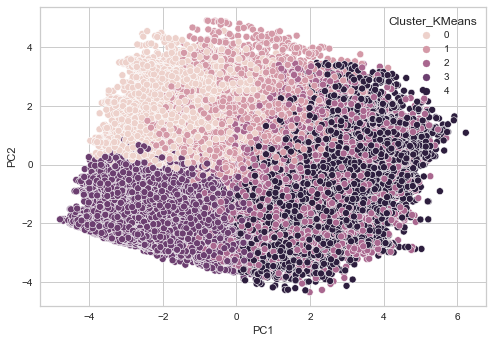

In [190]:
sns.scatterplot(data=cluster_airline_train, x="PC1",y="PC2", hue="Cluster_KMeans")

<Figure size 480x480 with 0 Axes>

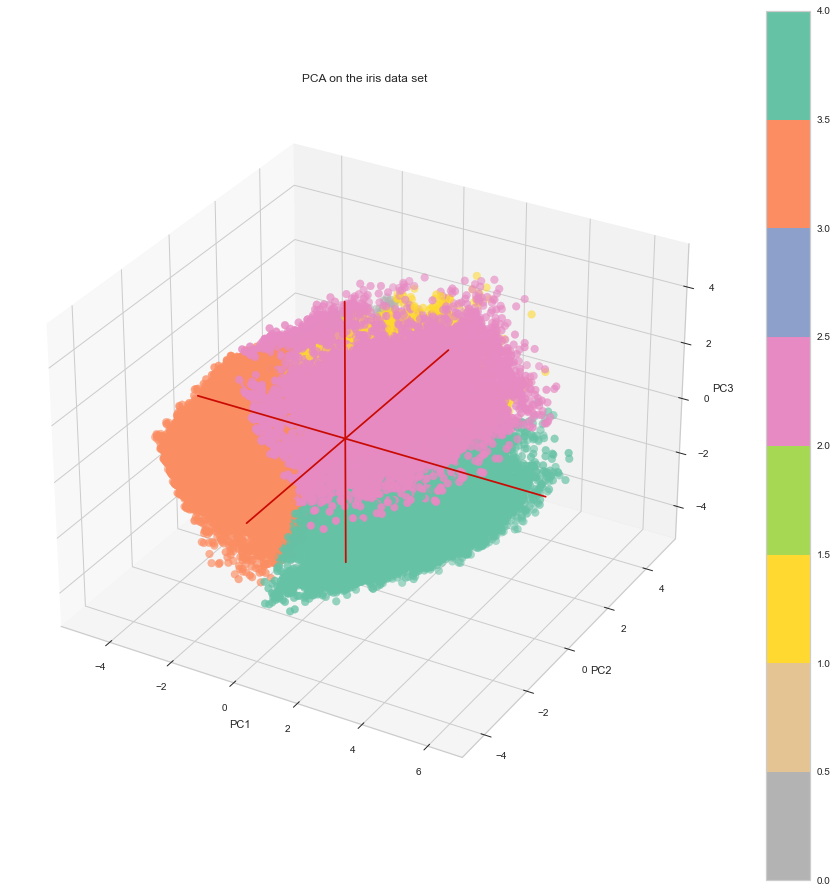

In [191]:
## Printing the results with PCA

# create figure
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

cluster_airline_train_copy = cluster_airline_train.copy()

# Keep the 'species' column appart + make it numeric for coloring
cluster_airline_train_copy['Cluster_KMeans']=pd.Categorical(cluster_airline_train_copy['Cluster_KMeans'])
my_color=cluster_airline_train_copy['Cluster_KMeans'].cat.codes
df = cluster_airline_train_copy.drop('Cluster_KMeans', 1)

# Plot initialisation
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df['PC1'], df['PC2'], df['PC3'], c=my_color, cmap="Set2_r", s=60)
#fig.colorbar(p, ax=ax,use_gridspec=False)

# make simple, bare axis lines through space:
xAxisLine = ((min(df['PC1']), max(df['PC1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(df['PC2']), max(df['PC2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(df['PC3']), max(df['PC3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on Airline Train")
plt.show()

<Figure size 480x480 with 0 Axes>

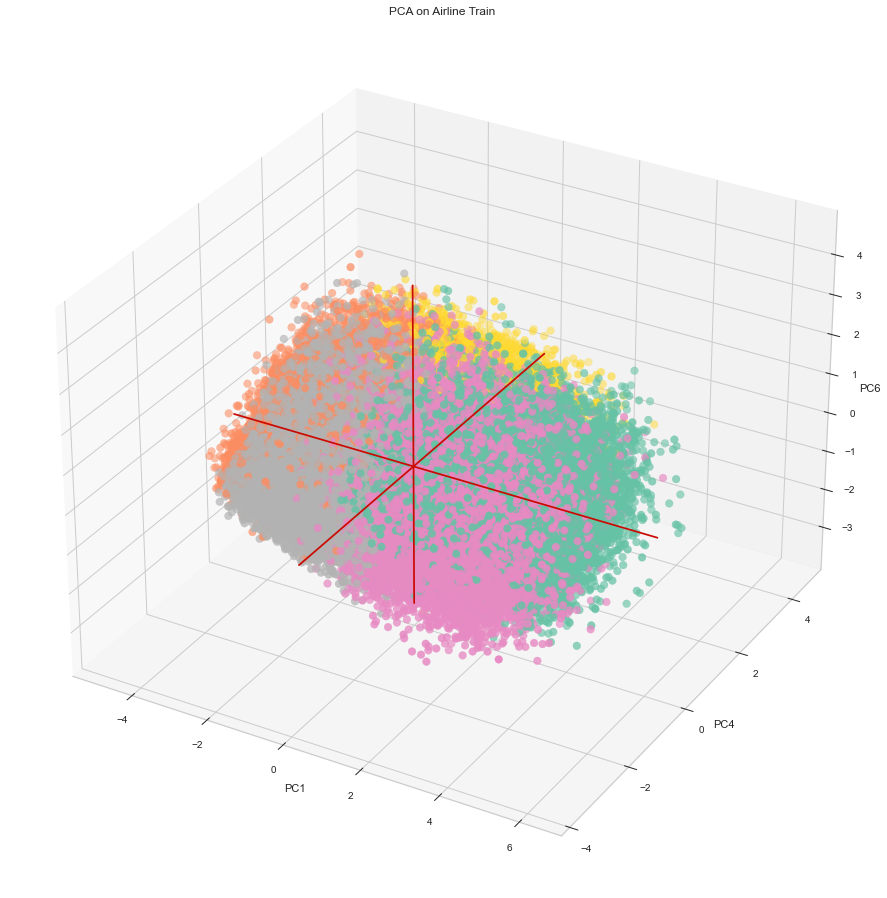

In [203]:
## Printing the results with PCA

# create figure
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

cluster_airline_train_copy = cluster_airline_train.copy()

# Keep the 'species' column appart + make it numeric for coloring
cluster_airline_train_copy['Cluster_KMeans']=pd.Categorical(cluster_airline_train_copy['Cluster_KMeans'])
my_color=cluster_airline_train_copy['Cluster_KMeans'].cat.codes
df = cluster_airline_train_copy.drop('Cluster_KMeans', 1)

# Plot initialisation
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df['PC1'], df['PC4'], df['PC6'], c=my_color, cmap="Set2_r", s=60)
#fig.colorbar(p, ax=ax,use_gridspec=False)

# make simple, bare axis lines through space:
xAxisLine = ((min(df['PC1']), max(df['PC1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(df['PC4']), max(df['PC4'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(df['PC6']), max(df['PC6'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC4")
ax.set_zlabel("PC6")
ax.set_title("PCA on Airline Train")
plt.show()

<Figure size 480x480 with 0 Axes>

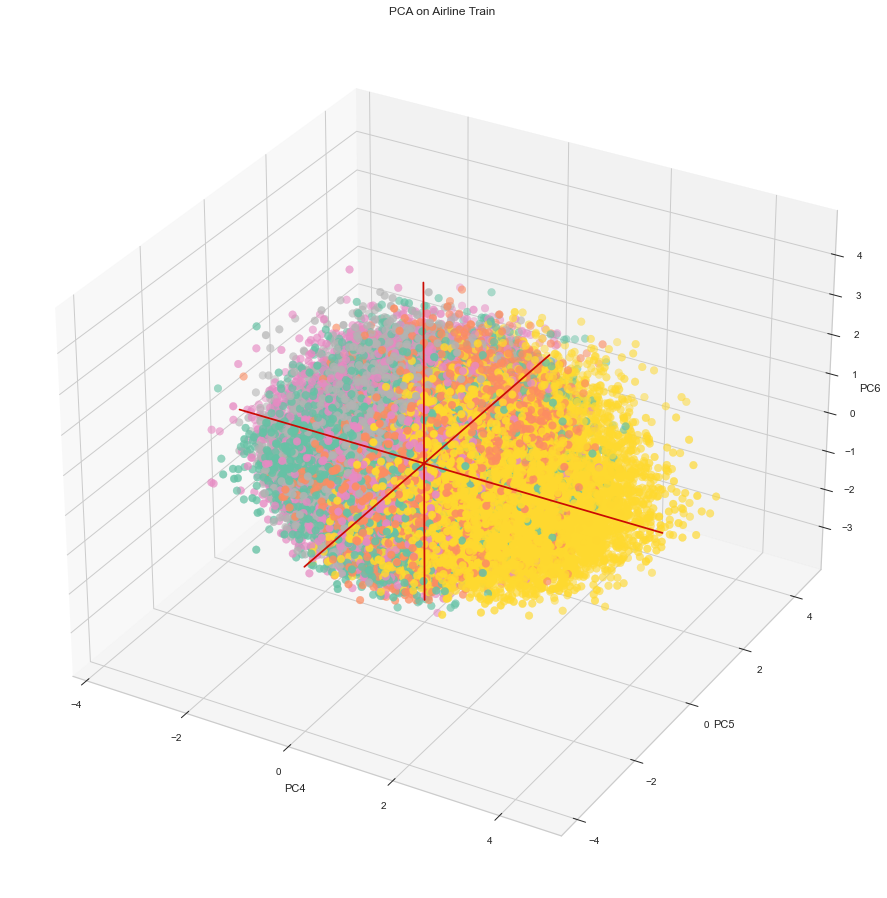

In [204]:
## Printing the results with PCA

# create figure
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

cluster_airline_train_copy = cluster_airline_train.copy()

# Keep the 'species' column appart + make it numeric for coloring
cluster_airline_train_copy['Cluster_KMeans']=pd.Categorical(cluster_airline_train_copy['Cluster_KMeans'])
my_color=cluster_airline_train_copy['Cluster_KMeans'].cat.codes
df = cluster_airline_train_copy.drop('Cluster_KMeans', 1)

# Plot initialisation
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df['PC4'], df['PC5'], df['PC6'], c=my_color, cmap="Set2_r", s=60)
#fig.colorbar(p, ax=ax,use_gridspec=False)

# make simple, bare axis lines through space:
xAxisLine = ((min(df['PC4']), max(df['PC4'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(df['PC5']), max(df['PC5'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(df['PC6']), max(df['PC6'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC4")
ax.set_ylabel("PC5")
ax.set_zlabel("PC6")
ax.set_title("PCA on Airline Train")
plt.show()

In [219]:
airline_train_cluster.groupby("Cluster_KMeans").count()

,Gender,Loyal,Age,Business Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Dissatisfied,Cluster_DBSCAN
Cluster_KMeans,,,,,,,,,,,,,,,,,,,,,,,,
0,22047,22047,22047,22047,22047,22047,22047,22047,22047,22047,22047,22047,22047,22047,22047,22047,22047,22047,22047,22047,22047,21970,22047,22047
1,18621,18621,18621,18621,18621,18621,18621,18621,18621,18621,18621,18621,18621,18621,18621,18621,18621,18621,18621,18621,18621,18565,18621,18621
2,19143,19143,19143,19143,19143,19143,19143,19143,19143,19143,19143,19143,19143,19143,19143,19143,19143,19143,19143,19143,19143,19092,19143,19143
3,24722,24722,24722,24722,24722,24722,24722,24722,24722,24722,24722,24722,24722,24722,24722,24722,24722,24722,24722,24722,24722,24645,24722,24722
4,19371,19371,19371,19371,19371,19371,19371,19371,19371,19371,19371,19371,19371,19371,19371,19371,19371,19371,19371,19371,19371,19322,19371,19371


### DBSCAN clustering

In [205]:
from sklearn.cluster import DBSCAN

In [214]:
# Model creation
dbscan_model = DBSCAN(eps=1.1)

# Model fitting
dbscan_model.fit(X_airline_train)

# Storing the result in a column of our new DataFrame
airline_train_cluster["Cluster_DBSCAN"] = dbscan_model.labels_

In [215]:
print("Number of clusters:", len(set(dbscan_model.labels_)))

Number of clusters: 4


In [216]:
# Looking at the different clusters created:
airline_train_cluster.groupby("Cluster_DBSCAN").mean()

,Gender,Loyal,Age,Business Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Dissatisfied,Cluster_KMeans
Cluster_DBSCAN,,,,,,,,,,,,,,,,,,,,,,,
-1,0.570194,0.812095,43.561555,0.565875,804.293737,2.12527,2.570194,1.907127,2.732181,2.848812,2.349892,2.887689,2.909287,2.626350,2.598272,2.609071,2.799136,2.667387,2.801296,13.954644,14.360870,0.429806,2.004320
0,0.507203,0.817358,39.359744,0.690193,1191.244847,2.73253,3.062505,2.760867,2.978015,3.203902,3.254602,3.442078,3.360372,3.385741,3.354474,3.636447,3.306501,3.644839,3.288721,14.820694,15.183544,0.567291,2.007396
1,0.200000,0.800000,42.800000,0.400000,547.400000,0.20000,4.600000,0.000000,3.600000,1.000000,0.200000,1.000000,1.000000,3.200000,1.400000,2.400000,4.800000,2.400000,1.000000,1.400000,2.200000,0.200000,0.000000
2,0.250000,0.500000,67.250000,0.750000,120.500000,2.25000,0.750000,2.000000,1.250000,1.000000,2.000000,1.000000,1.000000,3.750000,4.500000,4.250000,2.750000,3.750000,1.000000,0.000000,0.000000,0.750000,0.000000


In [218]:
airline_train_cluster.groupby("Cluster_DBSCAN").count()

,Gender,Loyal,Age,Business Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Dissatisfied,Cluster_KMeans
Cluster_DBSCAN,,,,,,,,,,,,,,,,,,,,,,,,
-1,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,460,463,463
0,103432,103432,103432,103432,103432,103432,103432,103432,103432,103432,103432,103432,103432,103432,103432,103432,103432,103432,103432,103432,103432,103125,103432,103432
1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


**Conclusion:** the DBSCAN doesn't perform well in this case, either creating a huge number of clusters or creating not enough clusters. Since this model is too slow to run and it provokes very different results for a slight modification in `eps`, it is hard to adopt and optimise this model.

Hence, I won't use it in this case.